In [14]:
import pandas as pd

df = pd.read_csv('MSFT.csv')

df


,Date,Open,High,Low,Close,Adj Close,Volume
0,1986-03-13,0.088542,0.101563,0.088542,0.097222,0.060980,1031788800
1,1986-03-14,0.097222,0.102431,0.097222,0.100694,0.063158,308160000
2,1986-03-17,0.100694,0.103299,0.100694,0.102431,0.064247,133171200
3,1986-03-18,0.102431,0.103299,0.098958,0.099826,0.062613,67766400
4,1986-03-19,0.099826,0.100694,0.097222,0.098090,0.061524,47894400
...,...,...,...,...,...,...,...
9214,2022-10-03,235.410004,241.610001,234.660004,240.740005,240.740005,28880400
9215,2022-10-04,245.089996,250.360001,244.979996,248.880005,248.880005,34888400
9216,2022-10-05,245.990005,250.580002,244.100006,249.199997,249.199997,20347100
9217,2022-10-06,247.929993,250.339996,246.080002,246.789993,246.789993,20239900


In [15]:
# import pandas as pd
# import requests

# data = requests.get(
#     'https://ravenclaw-services.herokuapp.com/CRUD/admin/lihat-data-pengajuan')
# df = pd.DataFrame(data.json())
# df.sample(4)

# df['Date'] = df['due'].apply(lambda x:x['due_date'])
# df['Close'] = df['bsu'].apply(lambda x:x['bsu_fix'])

In [16]:
df = df[['Date', 'Close']]

df


,Date,Close
0,1986-03-13,0.097222
1,1986-03-14,0.100694
2,1986-03-17,0.102431
3,1986-03-18,0.099826
4,1986-03-19,0.098090
...,...,...
9214,2022-10-03,240.740005
9215,2022-10-04,248.880005
9216,2022-10-05,249.199997
9217,2022-10-06,246.789993


In [17]:
df['Date']


0       1986-03-13
1       1986-03-14
2       1986-03-17
3       1986-03-18
4       1986-03-19
           ...    
9214    2022-10-03
9215    2022-10-04
9216    2022-10-05
9217    2022-10-06
9218    2022-10-07
Name: Date, Length: 9219, dtype: object

In [18]:
import datetime


def str_to_datetime(s):
  split = s.split('-')
  year, month, day = int(split[0]), int(split[1]), int(split[2])
  return datetime.datetime(year=year, month=month, day=day)


datetime_object = str_to_datetime('1986-03-19')
datetime_object


datetime.datetime(1986, 3, 19, 0, 0)

In [19]:
df

,Date,Close
0,1986-03-13,0.097222
1,1986-03-14,0.100694
2,1986-03-17,0.102431
3,1986-03-18,0.099826
4,1986-03-19,0.098090
...,...,...
9214,2022-10-03,240.740005
9215,2022-10-04,248.880005
9216,2022-10-05,249.199997
9217,2022-10-06,246.789993


In [20]:
df['Date'] = df['Date'].apply(str_to_datetime)
df['Date']

C:\Users\hafid\AppData\Local\Temp/ipykernel_20848/2565755782.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Date'] = df['Date'].apply(str_to_datetime)


0      1986-03-13
1      1986-03-14
2      1986-03-17
3      1986-03-18
4      1986-03-19
          ...    
9214   2022-10-03
9215   2022-10-04
9216   2022-10-05
9217   2022-10-06
9218   2022-10-07
Name: Date, Length: 9219, dtype: datetime64[ns]

In [21]:
df = df.sort_values(by='Date')
df.head(3)

,Date,Close
0,1986-03-13,0.097222
1,1986-03-14,0.100694
2,1986-03-17,0.102431


In [22]:
df.index = df.pop('Date')

df


,Close
Date,
1986-03-13,0.097222
1986-03-14,0.100694
1986-03-17,0.102431
1986-03-18,0.099826
1986-03-19,0.098090
...,...
2022-10-03,240.740005
2022-10-04,248.880005
2022-10-05,249.199997


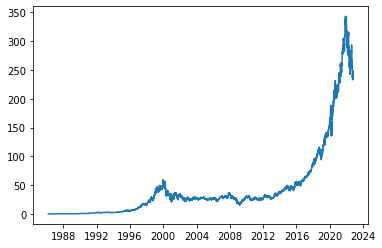

In [23]:
import matplotlib.pyplot as plt

plt.plot(df.index, df['Close'])


In [24]:
import numpy as np

def df_to_windowed_df(dataframe, first_date_str, last_date_str, n=3):
  first_date = str_to_datetime(first_date_str)
  last_date  = str_to_datetime(last_date_str)

  target_date = first_date
  
  dates = []
  X, Y = [], []

  last_time = False
  while True:
    df_subset = dataframe.loc[:target_date].tail(n+1)
    
    if len(df_subset) != n+1:
      print(f'Error: Window of size {n} is too large for date {target_date}')
      return

    values = df_subset['Close'].to_numpy()
    x, y = values[:-1], values[-1]

    dates.append(target_date)
    X.append(x)
    Y.append(y)

    next_week = dataframe.loc[target_date:target_date+datetime.timedelta(days=7)]
    next_datetime_str = str(next_week.head(2).tail(1).index.values[0])
    next_date_str = next_datetime_str.split('T')[0]
    year_month_day = next_date_str.split('-')
    year, month, day = year_month_day
    next_date = datetime.datetime(day=int(day), month=int(month), year=int(year))
    
    if last_time:
      break
    
    target_date = next_date

    if target_date == last_date:
      last_time = True
    
  ret_df = pd.DataFrame({})
  ret_df['Target Date'] = dates
  
  X = np.array(X)
  for i in range(0, n):
    X[:, i]
    ret_df[f'Target-{n-i}'] = X[:, i]
  
  ret_df['Target'] = Y

  return ret_df

# Start day second time around: '2021-03-25'
windowed_df = df_to_windowed_df(df, 
                                '2021-03-25', 
                                '2022-03-23', 
                                n=3)
windowed_df.head(3)

,Target Date,Target-3,Target-2,Target-1,Target
0,2021-03-25,235.990005,237.580002,235.460007,232.339996
1,2021-03-26,237.580002,235.460007,232.339996,236.479996
2,2021-03-29,235.460007,232.339996,236.479996,235.240005


In [26]:
def windowed_df_to_date_X_y(windowed_dataframe):
  df_as_np = windowed_dataframe.to_numpy()

  dates = df_as_np[:, 0]

  middle_matrix = df_as_np[:, 1:-1]
  X = middle_matrix.reshape((len(dates), middle_matrix.shape[1], 1))

  Y = df_as_np[:, -1]

  return dates, X.astype(np.float32), Y.astype(np.float32)


dates, X, y = windowed_df_to_date_X_y(windowed_df)

dates.shape, X.shape, y.shape


((252,), (252, 3, 1), (252,))

In [27]:
dates[0]

Timestamp('2021-03-25 00:00:00')

In [28]:
X[0]

array([[235.99],
       [237.58],
       [235.46]], dtype=float32)

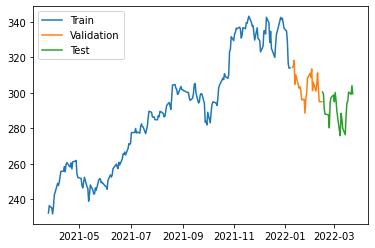

In [29]:
q_80 = int(len(dates) * .8)
q_90 = int(len(dates) * .9)

dates_train, X_train, y_train = dates[:q_80], X[:q_80], y[:q_80]

dates_val, X_val, y_val = dates[q_80:q_90], X[q_80:q_90], y[q_80:q_90]
dates_test, X_test, y_test = dates[q_90:], X[q_90:], y[q_90:]

plt.plot(dates_train, y_train)
plt.plot(dates_val, y_val)
plt.plot(dates_test, y_test)

plt.legend(['Train', 'Validation', 'Test'])


In [30]:
def windowed_df_to_date_X_y(windowed_dataframe):
  df_as_np = windowed_dataframe.to_numpy()

  dates = df_as_np[:, 0]

  middle_matrix = df_as_np[:, 1:-1]
  X = middle_matrix.reshape((len(dates), middle_matrix.shape[1], 1))

  Y = df_as_np[:, -1]

  return dates, X.astype(np.float32), Y.astype(np.float32)


dates, X, y = windowed_df_to_date_X_y(windowed_df)

dates.shape, X.shape, y.shape


((252,), (252, 3, 1), (252,))

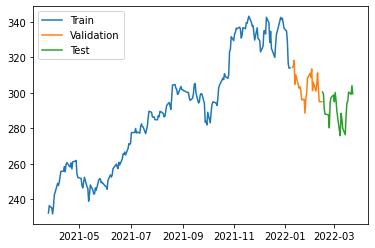

In [31]:
q_80 = int(len(dates) * .8)
q_90 = int(len(dates) * .9)

dates_train, X_train, y_train = dates[:q_80], X[:q_80], y[:q_80]

dates_val, X_val, y_val = dates[q_80:q_90], X[q_80:q_90], y[q_80:q_90]
dates_test, X_test, y_test = dates[q_90:], X[q_90:], y[q_90:]

plt.plot(dates_train, y_train)
plt.plot(dates_val, y_val)
plt.plot(dates_test, y_test)

plt.legend(['Train', 'Validation', 'Test'])


In [38]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import layers

model = Sequential([layers.Input((3, 1)),
                    layers.LSTM(64),
                    layers.Dense(32, activation='relu'),
                    layers.Dense(32, activation='relu'),
                    layers.Dense(1)])

model.compile(loss='mse',
              optimizer=Adam(learning_rate=0.001),
              metrics=['mean_absolute_error'])

model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=100)


Epoch 1/100
7/7 [==============================] - 4s 112ms/step - loss: 84518.6953 - mean_absolute_error: 288.9780 - val_loss: 92177.3125 - val_mean_absolute_error: 303.5199
Epoch 2/100
7/7 [==============================] - 0s 10ms/step - loss: 84221.5391 - mean_absolute_error: 288.4647 - val_loss: 91845.7578 - val_mean_absolute_error: 302.9732
Epoch 3/100
7/7 [==============================] - 0s 10ms/step - loss: 83898.8438 - mean_absolute_error: 287.9033 - val_loss: 91448.0078 - val_mean_absolute_error: 302.3161
Epoch 4/100
7/7 [==============================] - 0s 10ms/step - loss: 83488.6172 - mean_absolute_error: 287.1894 - val_loss: 90975.7734 - val_mean_absolute_error: 301.5341
Epoch 5/100
7/7 [==============================] - 0s 11ms/step - loss: 83010.2734 - mean_absolute_error: 286.3578 - val_loss: 90435.8203 - val_mean_absolute_error: 300.6374
Epoch 6/100
7/7 [==============================] - 0s 9ms/step - loss: 82462.8203 - mean_absolute_error: 285.4012 - val_loss: 897

In [41]:
model.evaluate

<bound method Model.evaluate of <keras.engine.sequential.Sequential object at 0x0000019B790C5000>>

7/7 [==============================] - 0s 2ms/step


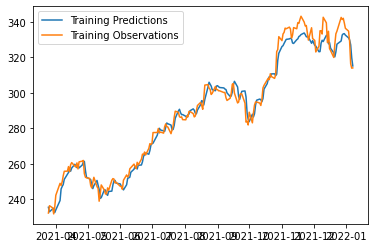

In [33]:
train_predictions = model.predict(X_train).flatten()

plt.plot(dates_train, train_predictions)
plt.plot(dates_train, y_train)
plt.legend(['Training Predictions', 'Training Observations'])

In [35]:
import plotly.graph_objects as go

fig = go.Figure()

fig.add_trace(
    go.Scatter(
        x=dates_train,
        y=train_predictions,
        name='Predictions'
    ))

fig.add_trace(
    go.Scatter(
        x=dates_train,
        y=y_train,
        name='Target Data'
    ))

fig.add_t

fig.show()
